In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
def load_pickle(filename):
    with open(filename, 'rb') as f:
        arr = pickle.load(f)
    return arr

In [27]:
train = load_pickle('bouncing_balls_training_data.pkl')
train.shape

(40, 20, 80, 80)

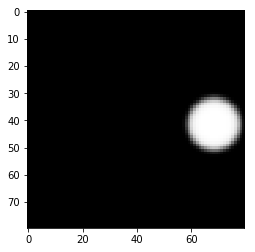

In [31]:
plt.imshow(train[0,0,:,:],cmap=matplotlib.cm.Greys_r)

In [66]:
sigma0_vec = np.array([0.2, 0.4, 0.6])
sigma0 = np.diag(sigma0_vec)
mu0 = np.array([2, 4, 6])

sigma1_vec = np.array([0.1, 0.3, 0.5])
sigma1 = np.diag(sigma1_vec)
mu1 = np.array([1, 3, 5])

k = 0.333

z1 = np.trace(np.matmul(np.linalg.inv(sigma1), sigma0))
z2 = np.matmul(np.matmul(np.transpose(mu1-mu0), np.linalg.inv(sigma1)), (mu1-mu0))
z3 = np.log(np.linalg.det(sigma1)/np.linalg.det(sigma0))
Dkl = 0.5 * (z1 + z2 - k + z3)
Dkl

9.185257928430493

In [69]:
z1

4.533333333333333

In [70]:
np.sum(1/sigma1_vec * sigma0_vec)

4.533333333333333

In [71]:
z2

15.333333333333334

In [72]:
np.sum((mu1-mu0)*1/sigma1_vec*(mu1-mu0))

15.333333333333334

In [73]:
z3

-1.163150809805681

In [74]:
np.log(np.prod(sigma1_vec) / np.prod(sigma0_vec))

-1.163150809805681

In [76]:
0.5 * (np.sum(1.0/sigma1_vec * sigma0_vec) + np.sum((mu1-mu0)*1/sigma1_vec*(mu1-mu0)) - k + np.log(np.prod(sigma1_vec) / np.prod(sigma0_vec)))

9.185257928430493

In [85]:
import tensorflow as tf

mu0 = tf.placeholder(tf.float32, shape=(3,))
sigma0 = tf.placeholder(tf.float32, shape=(3,))
mu1 = tf.placeholder(tf.float32, shape=(3,))
sigma1 = tf.placeholder(tf.float32, shape=(3,))


# https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
k = 0.0
tf1 = tf.reduce_sum(1.0/sigma1 * sigma0)
tf2 = tf.reduce_sum((mu1-mu0)*1.0/sigma1*(mu1-mu0))
tf3 = tf.cast(tf.log(tf.reduce_prod(sigma1/sigma0)), tf.float32)
Dkl = 0.5 * (tf1 + tf2 - k + tf3)

with tf.Session() as sess:
    
    sigma0_vec = np.array([0.2, 0.4, 0.6])
    mu0_vec = np.array([2, 4, 6])
    sigma1_vec = np.array([0.1, 0.3, 0.5])
    mu1_vec = np.array([1, 3, 5])

    zz = sess.run(Dkl, feed_dict={mu0: mu0_vec, sigma0:sigma0_vec, mu1: mu1_vec, sigma1:sigma1_vec})
    print(zz)

9.185258
